In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [2]:
label_dict = {
    0: 'Other',
    1: 'Music',
    2: 'Human voice',
    3: 'Engine sounds',
    4: 'Alarm',
}

x_ticks = np.linspace(0, 95, 5)
x_labels = np.linspace(0, 2, 5)

y_ticks = np.linspace(0, 31, 6)
y_labels = [8192, 4096, 2048, 1024, 512, 0]

In [3]:
train_spectrograms = np.load('data/training.npy')
train_labels = np.load('data/training_labels.npy')

print('Train spectrogram shape:', train_spectrograms.shape)
print('Train labels shape:', train_labels.shape)

print('Train spectrogram dtype:', train_spectrograms.dtype)

Train spectrogram shape: (52890, 32, 96)
Train labels shape: (52890,)
Train spectrogram dtype: float32


In [4]:
test_spectrograms = np.load('data/test.npy')

print('Test spectrogram shape:', test_spectrograms.shape)
print('Test spectrogram dtype:', test_spectrograms.dtype)

Test spectrogram shape: (5347, 32, 96)
Test spectrogram dtype: float32


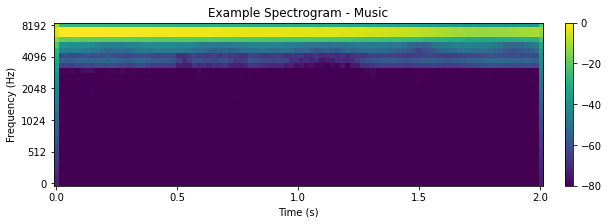

In [5]:

EXAMPLE_INDEX = np.random.randint(0, len(train_spectrograms))

plt.figure(figsize=(10, 3))

im = plt.imshow(train_spectrograms[EXAMPLE_INDEX])
plt.colorbar(im, fraction=0.046, pad=0.04)

plt.title(f'Example Spectrogram - {label_dict[train_labels[EXAMPLE_INDEX]]}')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.xticks(x_ticks, x_labels)
plt.yticks(y_ticks, y_labels)

plt.show()

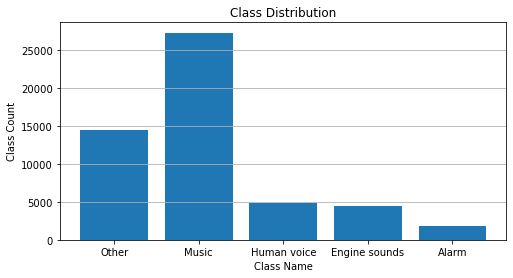

In [6]:

label_counts = np.bincount(train_labels)

plt.figure(figsize=(8, 4))

plt.bar(list(label_dict.keys()), label_counts)
plt.xticks(list(label_dict.keys()), list(label_dict.values()))
plt.ylabel('Class Count')
plt.xlabel('Class Name')
plt.grid(axis='y')

plt.title('Class Distribution')

os.makedirs('images', exist_ok=True)
plt.savefig('images/classes.png', dpi=300)
plt.show()

In [7]:
np.bincount(train_labels)

array([14530, 27340,  4823,  4412,  1785])

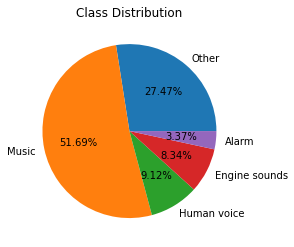

In [8]:
plt.figure(figsize=(8, 4))

plt.pie(label_counts, labels=list(label_dict.values()), autopct='%1.2f%%')

plt.title('Class Distribution')
plt.show()

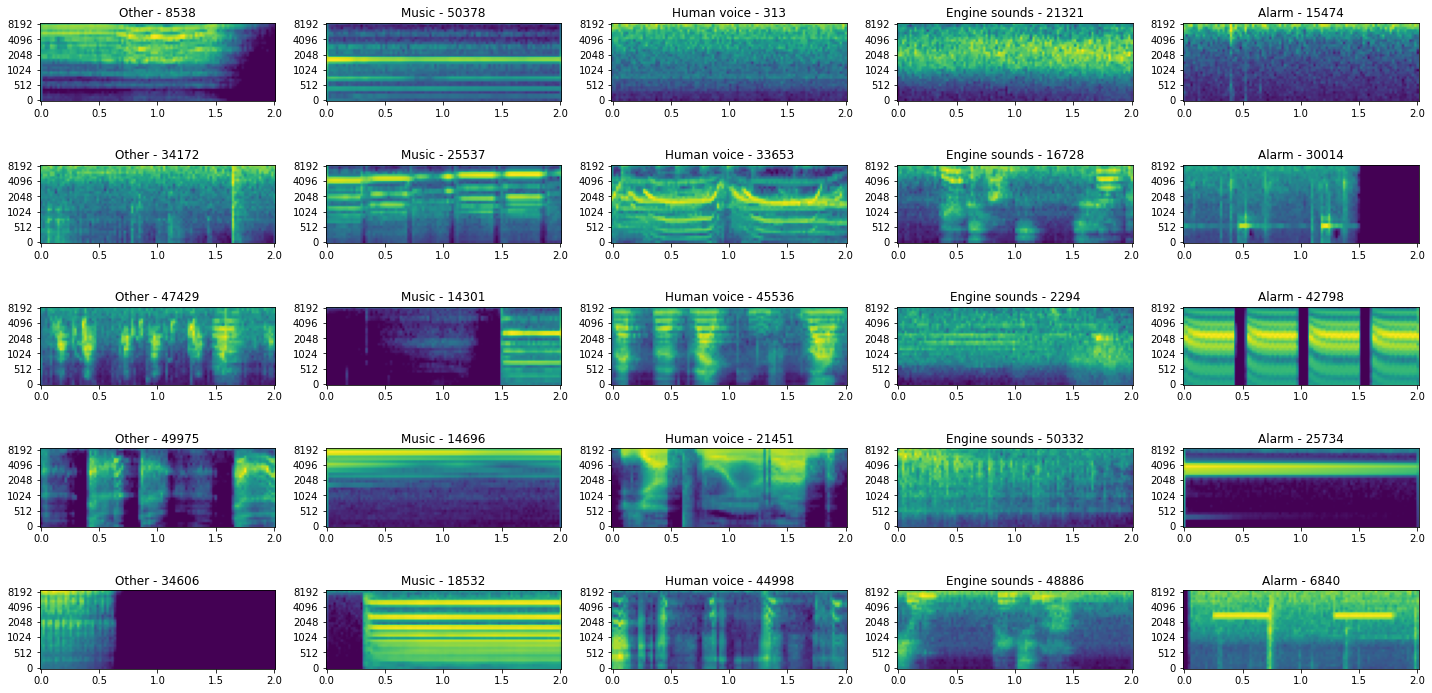

In [9]:
NUM_ROWS = 5
NUM_CLASSES = len(label_dict)

fig, axs = plt.subplots(NUM_ROWS, NUM_CLASSES, figsize=(20, 10))

for i in range(NUM_ROWS):
    for j in range(NUM_CLASSES):
        sample_index = np.random.choice(np.where(train_labels == j)[0])
        label = label_dict[j]
        spectrogram = train_spectrograms[sample_index]
        
        axs[i, j].imshow(spectrogram, cmap='viridis')
        
        axs[i, j].set_title(f'{label} - {sample_index}')
        axs[i, j].set_xticks(x_ticks, x_labels)
        axs[i, j].set_yticks(y_ticks, y_labels)

plt.tight_layout()

os.makedirs('images', exist_ok=True)
plt.savefig('images/spectrograms.png', dpi=300)
plt.show()

In [10]:
train_pca = PCA(n_components=2).fit_transform(train_spectrograms.reshape(len(train_spectrograms), -1))
test_pca = PCA(n_components=2).fit_transform(test_spectrograms.reshape(len(test_spectrograms), -1))

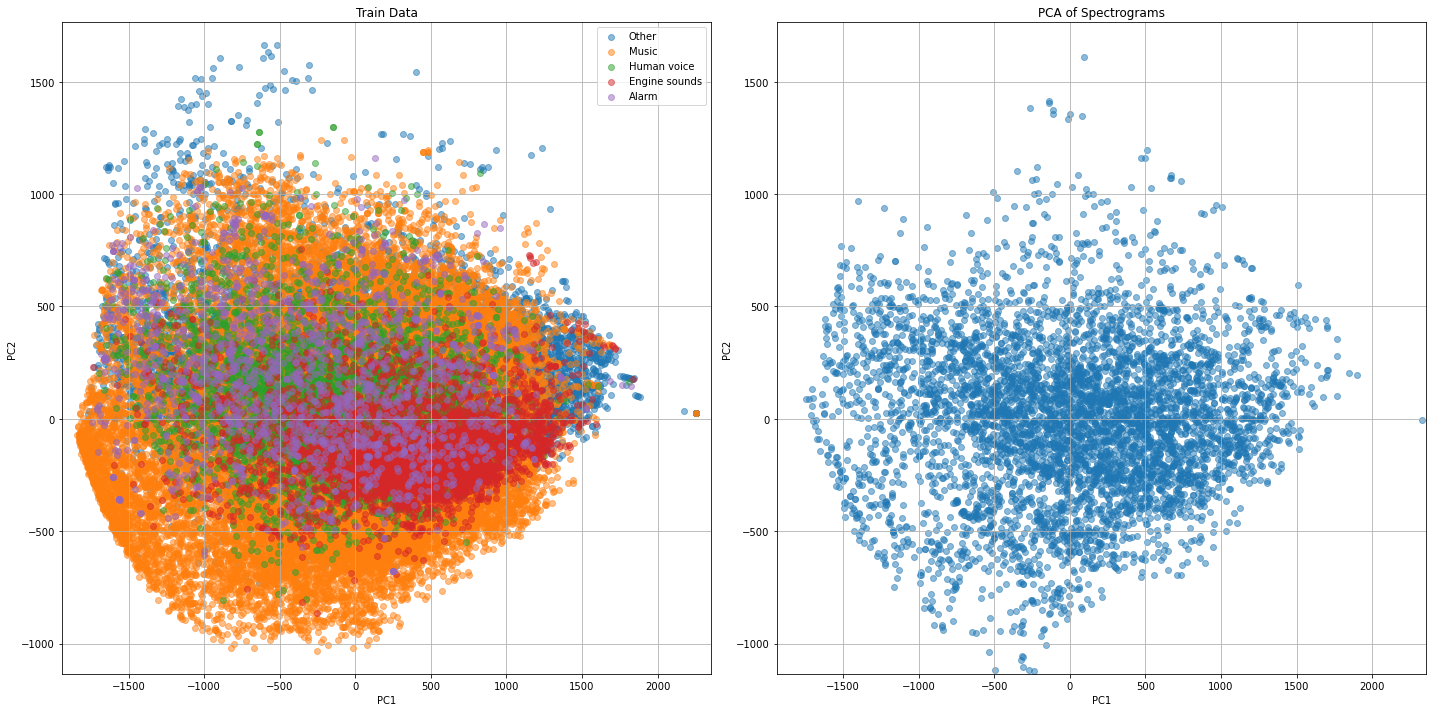

In [11]:
x_min, x_max = train_pca[:, 0].min() - 100, train_pca[:, 0].max() + 100
y_min, y_max = train_pca[:, 1].min() - 100, train_pca[:, 1].max() + 100

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

for i in range(NUM_CLASSES):
    axs[0].scatter(train_pca[train_labels == i, 0], train_pca[train_labels == i, 1], label=label_dict[i], alpha=0.5)
axs[0].set_title('Train Data')
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')
axs[0].set_xlim(x_min, x_max)
axs[0].set_ylim(y_min, y_max)
axs[0].grid()
axs[0].legend()

axs[1].scatter(test_pca[:, 0], test_pca[:, 1], alpha=0.5)
axs[1].set_title('Test Data')
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')
axs[1].set_xlim(x_min, x_max)
axs[1].set_ylim(y_min, y_max)
axs[1].grid()

plt.title('PCA of Spectrograms')
plt.tight_layout()

os.makedirs('images', exist_ok=True)
plt.savefig('images/pca.png', dpi=300)

plt.show()